## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df[df['converted'] == 1].shape[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment') | (df['landing_page'] != 'new_page') & (df['group'] == 'treatment')].shape[0]


3893

f. Do any of the rows have missing values?

In [157]:
df.info()
print('\nNo rows have any missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB

No rows have any missing values


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['landing_page'] == 'new_page') & (df['group'] == 'treatment')) | ((df['landing_page'] == 'old_page') & (df['group'] == 'control'))]


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [158]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates(subset = ['user_id'], keep = 'first')


In [16]:
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
total = df2.shape[0]
df2[df2['converted'] == 1].shape[0]/total

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df_control = df2[df2['group'] == 'control']
df_control[df_control['converted'] == 1].shape[0]/df_control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df_treatment = df2[df2['group'] == 'treatment']
df_treatment[df_treatment['converted'] == 1].shape[0]/df_treatment.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df2[df2['landing_page'] == 'new_page'].shape[0]/total

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>Just looking at parts a-e we actually see that there is a higher probability that the control group had a higher conversion rate than the treatment group, suggesting that the new page does not lead to more conversions. That being said we can investigate this further using models to see if this trend continues on average.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**$p_{old}$** >= **$p_{new}$**    NULL <br>
**$p_{old}$** < **$p_{new}$**     ALTERNATIVE


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2[df2['converted'] == 1].shape[0]/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2[df2['converted'] == 1].shape[0]/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(1,p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(1,p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
newnew = new_page_converted.mean()
oldold = old_page_converted.mean()

newnew-oldold

0.0012504969181338504

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = []
for _ in range(10000):
    newset_npage_converted = np.random.binomial(1,p_new, n_new).mean()
    newset_opage_converted = np.random.binomial(1,p_old, n_old).mean()
    p_diffs.append(newset_npage_converted-newset_opage_converted)

    
    #new_set = df2.sample(df2.shape[0],replace = True)
    #newset_converted = new_set[new_set['converted'] == 1].shape[0]/new_set.shape[0]
    #newset_new = new_set[new_set['landing_page'] == 'new_page'].shape[0]
    #newset_old = new_set[new_set['landing_page'] == 'old_page'].shape[0]

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

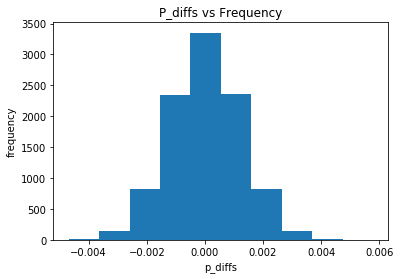

In [38]:
plt.hist(p_diffs);
plt.xlabel('p_diffs');
plt.ylabel('frequency');
plt.title('P_diffs vs Frequency');


>This distribution is what we would expect to see because under the null both the old/new landing pages have the same convert rate. The total number in each data set was approximately equal as well (and very large) so we should expect the distribution to be located close to 0. This is indeed what we see

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [41]:
actual = df2[df2['landing_page'] == 'new_page'].converted.mean() - df2[df2['landing_page'] == 'old_page'].converted.mean()


In [43]:
p_diffs = np.asarray(p_diffs)
(p_diffs > actual).mean()

0.9078

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>We have just computed the p value, which is the probability of observing our statistic assuming the null hypothesis is true. We see that there is almost no advantage with the new page here, as 90% of the p_diffs are greater than the actual difference observed in the original data set. Thus we can safely conclude that the null hypothesis is true.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [52]:
import statsmodels.api as sm

convert_old = df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)].shape[0]
convert_new = df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)].shape[0]
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [53]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative = 'smaller');
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [159]:
from scipy.stats import norm

# for our single-sides test, assumed at 95% confidence level, we calculate: 
# Tells us what our critical value at 95% confidence is 
print(norm.ppf(1-(0.05/2)))

0.9050583127590245
1.959963984540054


>According to the z-test we just did, the new convert rate would only be significant if the z-value was above 1.96 (for a 95% confidence interval), which it is not (1.31). Thus we can conclude it is not statistically significant to use the new_page vs. the old_page. Thus the null hypothesis is true, and we did not disprove it. The p-value calculated also closely matches the p-value we calculated in part j, which is a good sanity check.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.** (Because our possible outputs are binary)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [69]:
df2['intercept'] = 1
group = pd.get_dummies(df2['group'])
df2['ab_page'] = group['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [71]:
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [73]:
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:               8.077e-06
Time:                        14:30:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

>From this we see that if the group is treatment (i.e. the landing page is the new page) we have a slightly lower conversion rate than the control group (old page). This lines up with what we have seen in the previous sections, but this provides statistical evidence to support the claim

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>The p-value associated with ab_page is .190, and this differs from the p-value calculated earlier because we are using different input variables. In part III we have ab_page as our input, where as in part II we use the convert rate for each group.

Our new null and alternative hypothesis are: <br><br>
**$p_{old}$** - **$p_{new}$**  = 0   ---- NULL <br><br>
**$p_{old}$** - **$p_{new}$** != 0   ---- ALTERNATIVE
<br>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Other things that could influence whether or not a student converts are age and previous experience with the site. Age could play a large factor into what the user likes/dislikes, and thus could determine the decision to convert. In the same way users that already visted the site before vs. those who were visiting for the first time could have different opions due to the resistance to change

>These other factors could provide more insight but they could also provide misleading conclusions/coupled findings. For example we may find age is tied up very close with resistance to change. The new input variables could slightly dilute the statistics that are really significant and too many variables can lead to a larger standard error, depending on the accuracy of each of our variables

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [135]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [136]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [137]:
### Create the necessary dummy variables
df_new[[CA,UK,US]] = pd.get_dummies(df_new['country'])
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,0,1,0


In [138]:
CA_mean = df_new[df_new['country'] == 'CA'].converted.mean()
UK_mean = df_new[df_new['country'] == 'UK'].converted.mean()
US_mean = df_new[df_new['country'] == 'US'].converted.mean()
print('CA mean converted rate: ' + str(CA_mean))
print('UK mean converted rate: ' + str(UK_mean))
print('US mean converted rate: ' + str(US_mean))


CA mean converted rate: 0.11531829781364232
UK mean converted rate: 0.12059448568984076
US mean converted rate: 0.1195468006423762


> Thus we see from the output above that all three of the covnersions rate fall between 11%-12%. To see whther or not this is statistically significant we will need to analyze this more (done below), but at first glance the conversion rate does not seem to depend on the country

In [139]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
lm2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results2 = lm2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:               2.323e-05
Time:                        23:14:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [140]:
[results_i, results_page, results_US, results_UK] = np.exp(results2.params)
print(1/results_page, results_US, results_UK)

1.0150555970226318 1.0519444077083528 1.0415989517670607


In Laymen terms this means:

> <b>new users</b> are <u>1.5% less likely</u> to convert compared to old users. (Base case was taken to be the old_page in calculation above)<br>
> <b>UK users</b> are <u>4.2% more likely</u> than CA users to convert. (Base was taken to be CA user in calculation above)<br>
> <b>US users</b> are <u>5.2% more likely</u> than CA users to convert. (Base was taken to be CA user in calculation above)<br>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

>Now we want to see if there is any interaction between our input variables (the page chosen or the country chosen). Realize we already have columns filled with 1's and 0's for each country (CA,UK,US), and 1's and 0's for new_page vs old_page (ab_page).

In [143]:
df_interaction = df_new.copy()
df_interaction['CA_new_page'] = df_interaction['CA']*df_interaction['ab_page']
df_interaction['UK_new_page'] = df_interaction['UK']*df_interaction['ab_page']
df_interaction['US_new_page'] = df_interaction['US']*df_interaction['ab_page']
df_interaction.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_new_page,UK_new_page,US_new_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [146]:
# Look at logistic model for interaction between the page and country
lm3 = sm.Logit(df_interaction['converted'],df_interaction[['intercept','ab_page','UK','US','UK_new_page','US_new_page']])
results3 = lm3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:               3.482e-05
Time:                        23:30:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page        -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
UK_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
===============================================================================
"""

>Looking at the p-values from above, we see that (other than the intercept) all the p-values are more than .05 which is our accepted standard. Thus, not including the intercept, all the input variables are not statistically significant. This suggests that there isn't a statistical difference in the convert rate between countries.

In [156]:
[intercept3,ab_page3,UK3,US3,UK_new_page3,US_new_page3] = np.exp(results3.params)
print( 1/ab_page3, UK3, US3, UK_new_page3, US_new_page3)

1.0697747746096247 1.0118535284746648 1.0176823338671963 1.0814279687655681 1.04800102291153


To put this in more readable language:

*All results assume that all other variables are held constant

> <b>new users</b> are 7.0% less likely to convert compared to old users. (Base case was taken to be the old_page in calculation above)<br>
<b>UK users</b> are 1.2% more likely than CA users to convert. (Base was taken to be CA user in calculation above)<br>
<b>US users</b> are 1.8% more likely than CA users to convert. (Base was taken to be CA user in calculation above)<br>
<b>UK and new_page users</b> are 8.1% more likely than CA and new_page users are to convert. (Base was taken to be CA + new_page user in calculation above)<br>
<b>US and new_page users</b> are 4.8% more likely than CA and new_page users are to convert. (Base was taken to be CA + new_page user in calculation above)<br><br>

<a id='conclusions'></a>
## Conclusions

Through this project we were able to practice using different statistical methods to analyze datasets. In our particular dataset we were analyzing if a new page would attract more customers than the old page. We analyzed the data through various methods using different combinations of input variables, but all the results showed that the new page didn't attract more users; in fact, the new page actually performed slightly worse than the old page. A limitation for this experiment is the fact that we do not know if the users tested had any previous exposure to the site. Any previous interaction could have given the user a bias against the change, and this would have significantly skewed the results.


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.